### Diagnostic plots for the three noise assumptions in linear regression:
 1. noise is normally distributed -> QQ plot
 2. noise variance is constant -> residuals vs fitted
 3. noise is independent -> residual i vs residual i+1 (for serial correlation)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scipystats

import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats as stats 
import ggplot as gg
# from ggplot import *
%matplotlib inline 

In [2]:
sleepstudy = pd.read_csv('./data/sleepstudy.csv')

In [3]:
lm = smf.ols(formula = "Reaction ~ Days" , data = sleepstudy).fit()
print (lm.summary())

Y_plot = pd.concat([sleepstudy["Days"], pd.Series(lm.resid, name = 'Residuals'), pd.Series(lm.predict(), name = "Fitted")], axis = 1)

                            OLS Regression Results                            
Dep. Variable:               Reaction   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     71.46
Date:                Tue, 12 Dec 2017   Prob (F-statistic):           9.89e-15
Time:                        16:15:29   Log-Likelihood:                -950.15
No. Observations:                 180   AIC:                             1904.
Df Residuals:                     178   BIC:                             1911.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    251.4051      6.610     38.033      0.0

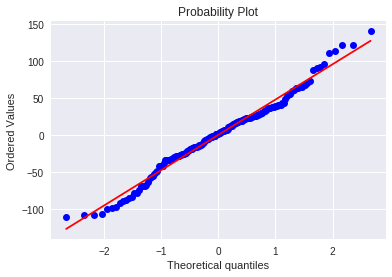

In [4]:
import pylab
scipystats.probplot(Y_plot.Residuals, dist="norm", plot=pylab)
pylab.show()

In [5]:
resid = Y_plot.Residuals
norm_resid = (Y_plot.Residuals - np.mean(Y_plot.Residuals)) / np.std(Y_plot.Residuals)
print (scipystats.kstest(norm_resid, 'norm'))

# # or use the statsmodels provided function kstest_normal to use kolmogorov-smirnov test or Anderson-Darling test
# print (stats.diagnostic.kstest_normal(Y_plot.Residuals, pvalmethod='approx'))
# print (stats.diagnostic.normal_ad(Y_plot.Residuals))

KstestResult(statistic=0.063360202057236581, pvalue=0.45210214242313018)


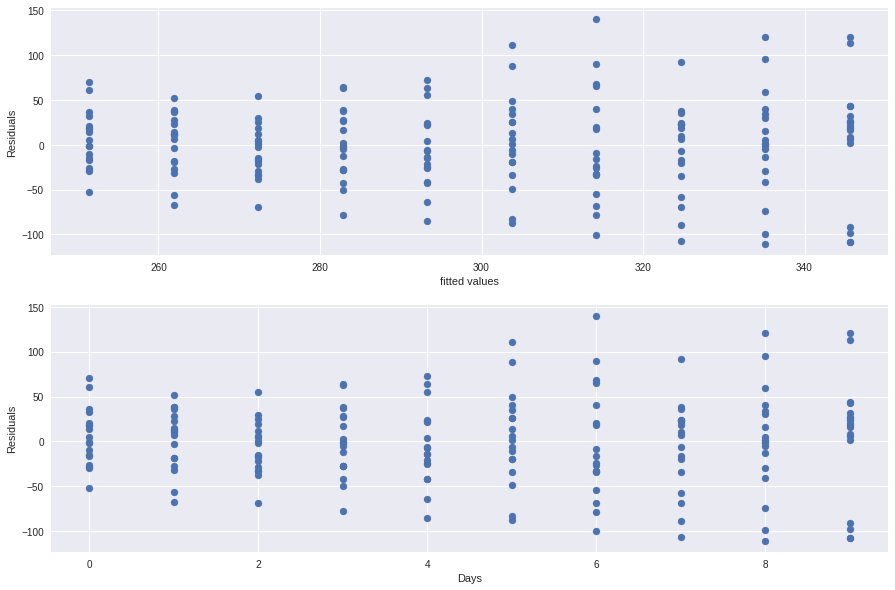

In [35]:
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(211)
ax.scatter(Y_plot.Fitted, Y_plot.Residuals)
ax.set_xlabel("fitted values")
ax.set_ylabel("Residuals")
ax=fig.add_subplot(212)
ax.scatter(Y_plot.Days, Y_plot.Residuals)
ax.set_ylabel("Residuals")
ax.set_xlabel("Days")

/home/andrii/anaconda3/lib/python3.6/site-packages/ggplot/stats/stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


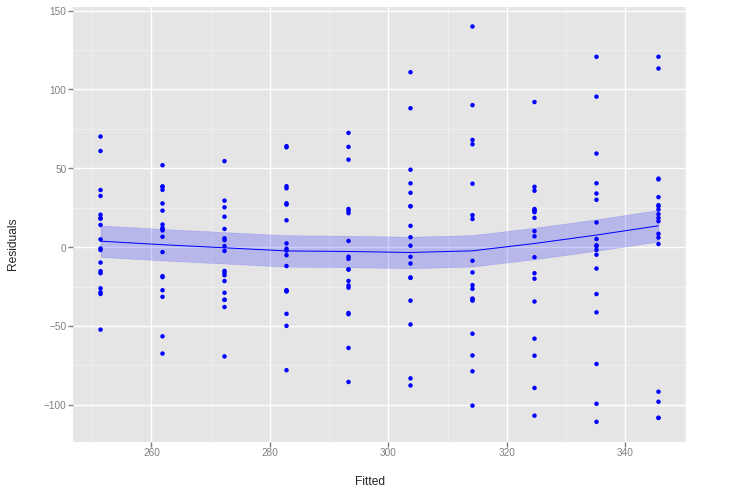

<ggplot: (8754031537437)>


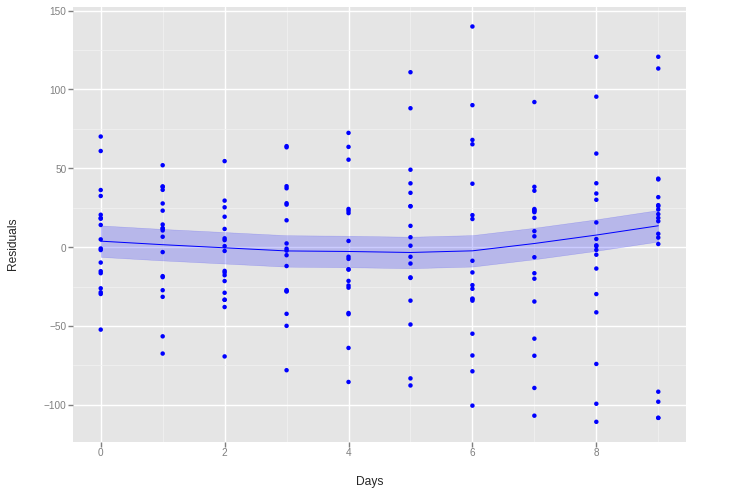

<ggplot: (-9223363282823238382)>


In [36]:
print(gg.ggplot(gg.aes(x='Fitted', y='Residuals'),data=Y_plot) + gg.geom_point(color="blue") + gg.stat_smooth(color="blue",method = 'loess'))
print(gg.ggplot(gg.aes(x='Days', y='Residuals'),data=Y_plot) + gg.geom_point(color="blue") + gg.stat_smooth(color="blue",method = 'loess'))

In [42]:
# independence. As the data were collected each day, I suspect serial correlation
Y_plot = Y_plot.assign(Subject = sleepstudy.Subject)
Y_plot = Y_plot.groupby("Subject")

def f(group):
    group["LagResiduals"]=group.Residuals.shift()
    return group
Y_plot = Y_plot.apply(f) 

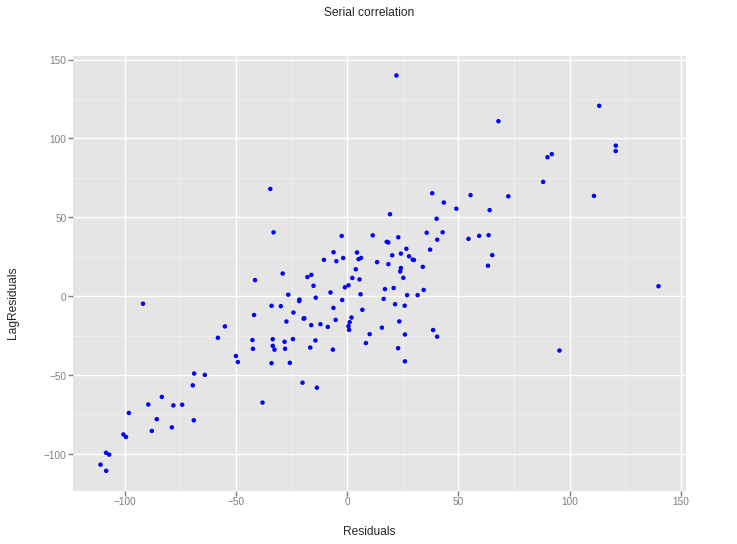

<ggplot: (8754030749781)>

In [43]:
gg.ggplot(gg.aes(x='Residuals', y='LagResiduals'),data=Y_plot) + gg.geom_point(color="blue") + gg.ggtitle("Serial correlation")
# Yup, this plot conforms a clear serial correlation

In [44]:
# for next plot I filter out "NA" values in LagResiduals to avoid warning messages
Y_plot=Y_plot[Y_plot['LagResiduals'].notnull()]

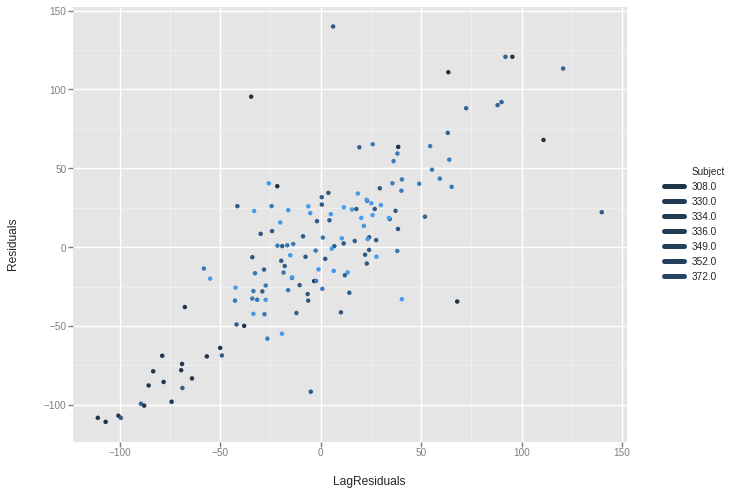

<ggplot: (-9223363282823278434)>

In [45]:
# alternative plot labels each subject in a different color
gg.ggplot(gg.aes(x = 'LagResiduals', y = 'Residuals',  color='Subject'),data=Y_plot)+gg.geom_point()
# this plot shows that the serial correlation exists both within and between subjects